<a href="https://colab.research.google.com/github/Siddhartha-data/ML_Model/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
df = pd.read_csv('wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [110]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol quality   type  
0         9.4   Legit    red  
1         9.8   Legit    red  
2         9.8   Legit    red  
3         9.8   Legit    red  
4         9.4   Legit    red  
...       ...     ...    ...  
6492     11.2   Legit  white  
6493      9.6   Legit  white  
6494      9.4   Legit  white  
6495     12.8   Legit  white  
6496     11.8   Legit  white  

[6497 rows x 13 columns]>

In [111]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [112]:
df.value_counts('quality')

,count
quality,
Legit,6251
Fraud,246


<Axes: xlabel='quality', ylabel='count'>

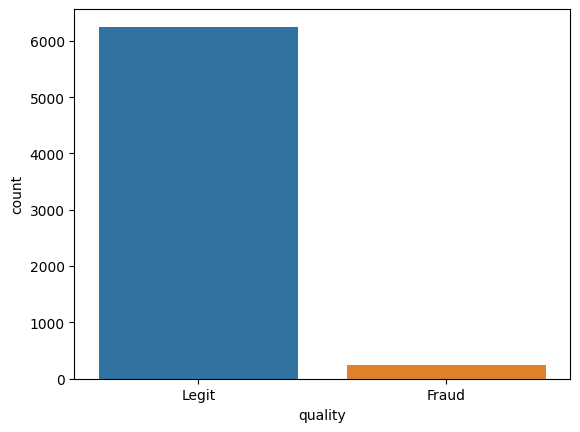

In [113]:
sns.countplot(data=df,  x='quality', hue='quality')

<Axes: xlabel='type', ylabel='count'>

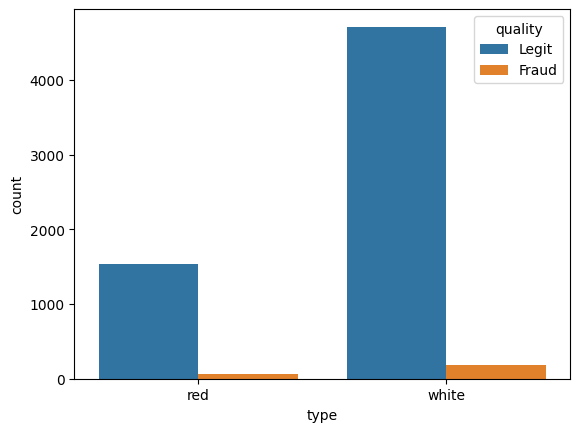

In [114]:
sns.countplot(data=df,  x='type', hue='quality')

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [116]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [117]:
len(df[df['quality']=='Fraud'])/len(df['quality'])*100

3.7863629367400335

In [118]:
df['type'].value_counts()

,count
type,
white,4898
red,1599


In [119]:
red=df[df['type']=='red']
white=df[df['type']=='white']

In [120]:
print("Percentage of fraud in Red Wines:")
print(100*len(red[red['quality']=='Fraud'])/len(red['quality']))


Percentage of fraud in Red Wines:
3.9399624765478425


In [121]:
print("Percentage of fraud in White Wines:")
print(100*len(white[white['quality']=='Fraud'])/len(white['quality']))

Percentage of fraud in White Wines:
3.736218864842793


In [122]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red


In [123]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

In [124]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0


In [125]:
df.corr(numeric_only=True)['Fraud'][:-1].sort_values(ascending=False)

,Fraud
volatile acidity,0.151228
chlorides,0.034499
fixed acidity,0.021794
pH,0.020107
density,0.016351
sulphates,-0.034046
total sulfur dioxide,-0.035252
residual sugar,-0.048756
alcohol,-0.051141
citric acid,-0.061789


In [126]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [127]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,False,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,False,0


In [128]:
df = df.drop('Fraud',axis=1)

In [129]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,False
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,False


In [130]:
X = df.drop('quality', axis=1)
y = df['quality']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [134]:
sv=SVC(kernel='rbf')

In [135]:
sv.fit(X_train,y_train)

SVC()

In [136]:
y_predict = sv.predict(X_test)

In [137]:
accuracy_score(y_test,y_predict)

0.9623076923076923

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
parameter = {'C':[0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],'kernel':['linear','poly']}

In [140]:
grid_model = GridSearchCV(SVC(),parameter,verbose=3)

In [141]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.962 total time=   0.1s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.962 total time=   0.1s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.962 total time=   0.1s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.962 total time=   0.1s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.962 total time=   0.1s
[CV 1/5] END ..............C=0.001, kernel=poly;, score=0.962 total time=   0.1s
[CV 2/5] END ..............C=0.001, kernel=poly;, score=0.962 total time=   0.1s
[CV 3/5] END ..............C=0.001, kernel=poly;, score=0.962 total time=   0.1s
[CV 4/5] END ..............C=0.001, kernel=poly;, score=0.962 total time=   0.1s
[CV 5/5] END ..............C=0.001, kernel=poly;, score=0.962 total time=   0.1s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.962 total time=   0.1s
[CV 2/5] END .............C=0.01, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],
                         'kernel': ['linear', 'poly']},
             verbose=3)

In [142]:
grid_model.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [143]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [144]:
y_predict = grid_model.predict(X_test)

In [145]:
confusion_matrix(y_test,y_predict)

array([[   0,   49],
       [   0, 1251]])

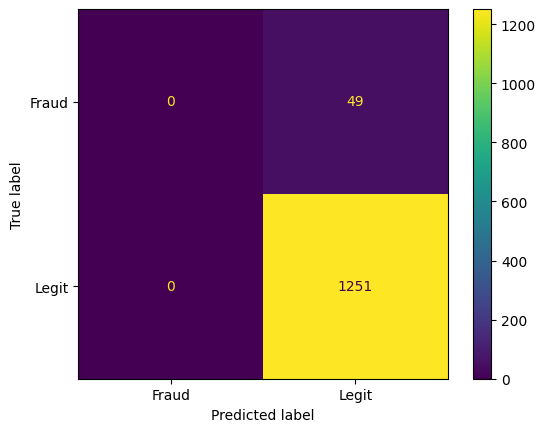

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your model 'grid_model' and have X_test and y_test

y_predict = grid_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict) # Calculate the confusion matrix

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model.classes_)
# grid_model.classes_ provides the labels (if available in your model)

# Plot the confusion matrix
disp.plot()
plt.show()

In [147]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        49
       Legit       0.96      1.00      0.98      1251

    accuracy                           0.96      1300
   macro avg       0.48      0.50      0.49      1300
weighted avg       0.93      0.96      0.94      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [148]:
from sklearn.metrics import accuracy_score

In [149]:
y_predict = grid_model.predict(X_test)

In [150]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9623076923076923


In [151]:
score = grid_model.score(X_test, y_test)
print(f"Score: {score}")

Score: 0.9623076923076923
